<a href="https://colab.research.google.com/github/Shyam657/Movie-recommendation-System/blob/main/Netflix_Movie_REcommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 5.5 MB 13.8 MB/s 
     |████████████████████████████████| 1.3 MB 43.3 MB/s 
     |████████████████████████████████| 163 kB 64.7 MB/s 
     |████████████████████████████████| 7.6 MB 49.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=b7f6e2c8cfb750b9416cac58fb9d7b47b5da53e64c15e47ab625cf121d863c59
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno
import torch
from sentence_transformers import SentenceTransformer, util

In [4]:
netflix_data = pd.read_csv('/content/drive/MyDrive/Temp_NLP/Netflix_movie_recommendation/netflix_titles.csv')
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


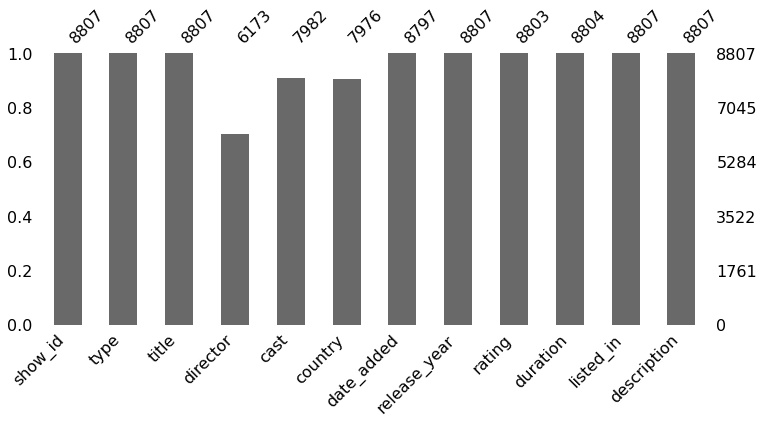

In [5]:
missingno.bar(netflix_data,figsize=(12,5))

In [6]:
netflix_data['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [7]:
netflix_data['title'].isnull().sum()

0

In [8]:
netflix_data['description'].isnull().sum()

0

In [9]:
descriptions = netflix_data['description'].tolist()
title = netflix_data['title'].tolist()

In [10]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [11]:
'''
embeddings = model.encode(descriptions)
print(embeddings)

'''

'\nembeddings = model.encode(descriptions)\nprint(embeddings)\n\n'

In [13]:
'''
embeddings2 = model.encode(title)

'''

'\nembeddings2 = model.encode(title)\n\n'

In [14]:
'''
np.save('descriptions_embeddings_09-11-2022.npy',embeddings)
np.save('title_embeddings_09-11-2022.npy',embeddings2)

'''

"\nnp.save('descriptions_embeddings_09-11-2022.npy',embeddings)\nnp.save('title_embeddings_09-11-2022.npy',embeddings2)\n\n"

In [15]:
embeddings=np.load('/content/drive/MyDrive/Temp_NLP/Netflix_movie_recommendation/descriptions_embeddings_09-11-2022.npy')
embeddings2=np.load('/content/drive/MyDrive/Temp_NLP/Netflix_movie_recommendation/title_embeddings_09-11-2022.npy')

In [20]:


def recommend(query):
    #Compute cosine-similarities with all embeddings 
    query_embedd = model.encode(query)
    cosine_scores = util.pytorch_cos_sim(query_embedd, embeddings)
    top5_matches = torch.argsort(cosine_scores, dim=-1, descending=True).tolist()[0][1:6]
    return top5_matches



In [21]:
id = 's1305'
query_show_des = netflix_data.loc[netflix_data['show_id'] == id]['description'].to_list()[0]
recommendded_results = recommend(query_show_des)

for index in recommendded_results:
    print(netflix_data.iloc[index,:])

show_id                                                      s168
type                                                        Movie
title                                               Open Season 2
director                      Matthew O'Callaghan, Todd Wilderman
cast            Joel McHale, Mike Epps, Jane Krakowski, Billy ...
country                                     United States, Canada
date_added                                      September 1, 2021
release_year                                                 2008
rating                                                         PG
duration                                                   76 min
listed_in                      Children & Family Movies, Comedies
description     Elliot the buck and his forest-dwelling cohort...
Name: 167, dtype: object
show_id                                                     s2155
type                                                        Movie
title                           Stars in the Sky: A

In [25]:
id2 = 's1'
query_show_des_2 = netflix_data.loc[netflix_data['show_id'] == id]['title'].to_list()[0]
recommendded_results = recommend(query_show_des)

for index in recommendded_results:
 print(netflix_data.iloc[index,:])

show_id                                                      s168
type                                                        Movie
title                                               Open Season 2
director                      Matthew O'Callaghan, Todd Wilderman
cast            Joel McHale, Mike Epps, Jane Krakowski, Billy ...
country                                     United States, Canada
date_added                                      September 1, 2021
release_year                                                 2008
rating                                                         PG
duration                                                   76 min
listed_in                      Children & Family Movies, Comedies
description     Elliot the buck and his forest-dwelling cohort...
Name: 167, dtype: object
show_id                                                     s2155
type                                                        Movie
title                           Stars in the Sky: A

Rough below 

In [23]:
query= netflix_data.loc[netflix_data['show_id'] == id2]['title'].to_list()[0]

query_embedd = model.encode(query)
cosine_scores = util.pytorch_cos_sim(query_embedd, embeddings)

top5_matches = torch.argsort(cosine_scores, dim=-1, descending=True).tolist()[0][1:6]

In [26]:
type(top5_matches)

list